# Meal Scoring

With this notebook we provide an application of the fruits and vegetable detction model: **Meal Scoring** based on an image. First each class is assigned to a color. We argue that the more colors are covered the more healthy the food is

- Healthiness Scoring Logic:
    - **Simple Scoring**: If a fruit or vegetable belongs to one of the 6color classes, one point is awarded. Every fruit or vegetable can only be counted once. However multiple points per class can be given - for instance if a picture contains both broccoli and lettuce (2 points green) 
    - **Complex Scoring**: Same as Simple Scoing but an extra point is given for each color covered to incentivise colorful meals.

- Creativity Scoring Logic:
    - **Color Diversity**: As a proxy of a creative image the number of unique color pixels is counted and normalised to output a percentage. 

In [1]:
import json

#loading fruits_vegetables_LVIS_dict.json
with open('fruits_vegetables_LVIS_dict.json') as f:
    fruits_vegetables_LVIS_dict = json.load(f)

In [2]:
# undestanding the order of fruits and vegetables in the dictionary
class_names = dict(enumerate(fruits_vegetables_LVIS_dict.values()))

## Assigning fruits and vegetables to colors manually:
- RED: 
    - 1: apple *Could be GREEN as well*
    - 8: bell pepper/capsicum *could be GREEN and YELLOW too*
    - 16: cayenne/cayenne spice/cayenne pepper/cayenne pepper spice/red pepper/red pepper
    - 18: cherry
    - 20: chili/chili vegetable/chili pepper/chili pepper vegetable/chilli/chilli vegetable/chilly/chilly
    - 30: Strawberry *this is a wrong label form LVLIS (should be removed later)*
    - 35: Tomato *this is a wrong label form LVLIS (should be removed later)*
    - 56: raspberry 
    - 57: strawberry
    - 59: tomato
    - 61: watermelon
- YELLOW + ORANGE: 
    - 2: apricot
    - 6: banana
    - 13: cantaloup/cantaloupe
    - 14: carrot 
    - 21: clementine
    - 23: edible corn/corn/maize
    - 37: lemon
    - 40: mandarin orange
    - 41: melon *exists in other colors too*
    - 44: orange/orange fruit
    - 45: papaya
    - 47: peach
    - 51: pineapple
    - 52: potato
    - 54: pumpkin
    - 58: sweet potato *could be BROWN or RED*
- GREEN: 
    - 3: artichoke
    - 4: asparagus *exist in WHITE too*
    - 5: avocado
    - 11: broccoli
    - 12: brussels sprouts
    - 17: celery
    - 24: cucumber/cuke
    - 26: eggplant/aubergine (if considering green variety)
    - 31: gourd
    - 33: green bean
    - 34: green onion/spring onion/scallion
    - 36: kiwi fruit
    - 38: lettuce
    - 39: lime
    - 46: pea/pea food
    - 48: pear *could be YELLOW or ORANGE as well*
    - 50: pickle
    - 62: zucchini/courgette
- BLUE + PURPLE:
    - 9: blackberry
    - 10: blueberry
    - 32: grape *exist in GREEN too*
    - 53: prune
- DARK RED: 
    - 27: fig/fig fruit
    - 49: persimmon
- WHITE + BROWN:
    - 0: almond
    - 7: bean curd/tofu
    - 15: cauliflower
    - 19: chickpea/garbanzo 
    - 22: coconut/cocoanut
    - 25: date/date fruit
    - 28: garlic/ail
    - 29: ginger/gingerroot
    - 42: mushroom
    - 43: onion
    - 55: radish/daikon
    - 60: turnip


In [3]:
# Manuelly assining fruits and vegetables classes to color schemes (see https://www.healthline.com/nutrition/eat-the-rainbow#benefits)
color_classes = {
    'RED': [1, 8, 16, 18, 20, 30, 35, 56, 57, 59, 61],
    'YELLOW + ORANGE': [2, 6, 13, 14, 21, 23, 37, 40, 41, 44, 45, 47, 51, 52, 54, 58],
    'GREEN': [3, 4, 5, 11, 12, 17, 24, 26, 31, 33, 34, 36, 38, 39, 46, 48, 50, 62],
    'BLUE + PURPLE': [9, 10, 32, 53],
    'DARK RED': [27, 49],
    'WHITE + BROWN': [0, 7, 15, 19, 22, 25, 28, 29, 42, 43, 55, 60],
}

### Example Images using our custom model

In [4]:
# if zipped unzip weights.zip
import zipfile
import os

zip_file_path = 'Model_Weights/weights.zip'

extract_dir = 'Model_Weights'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Files extracted to {extract_dir}')

Files extracted to Model_Weights


In [5]:
from ultralytics import YOLO
import os

# Load a model
model = YOLO('Model_Weights/yolo_fruits_and_vegetables_v2.pt')  # pretrained YOLOv8n model

image_dir = "LVIS_Fruits_And_Vegetables/images/test"
images = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]

num_images = 20

# Set confidence and iou threshold
conf = 0.6
iou = 0.1
show_results = False

# Run batched inference on a list of images
results = model(images[:num_images], conf=conf, iou=iou)  # return a list of Results objects

if show_results:
    for result in results:
        result.show()


0: 640x640 5 carrots, 2 lettuces, 1 strawberry, 1483.8ms
1: 640x640 5 broccolis, 10 carrots, 1 cauliflower, 1 pea/pea food, 1483.8ms
2: 640x640 1 asparagus, 16 blackberrys, 14 blueberrys, 1 green bean, 1483.8ms
3: 640x640 1 edible corn/corn/maize, 55 lemons, 3 orange/orange fruits, 1483.8ms
4: 640x640 (no detections), 1483.8ms
5: 640x640 (no detections), 1483.8ms
6: 640x640 1 apple, 1483.8ms
7: 640x640 (no detections), 1483.8ms
8: 640x640 2 orange/orange fruits, 1483.8ms
9: 640x640 1 banana, 1483.8ms
10: 640x640 2 orange/orange fruits, 1483.8ms
11: 640x640 2 orange/orange fruits, 1483.8ms
12: 640x640 (no detections), 1483.8ms
13: 640x640 (no detections), 1483.8ms
14: 640x640 1 broccoli, 4 carrots, 1 cucumber/cuke, 1483.8ms
15: 640x640 1 banana, 1483.8ms
16: 640x640 1 avocado, 2 pickles, 2 tomatos, 1483.8ms
17: 640x640 2 carrots, 1 lettuce, 6 tomatos, 1483.8ms
18: 640x640 20 blueberrys, 1483.8ms
19: 640x640 2 strawberrys, 1483.8ms
Speed: 8.2ms preprocess, 1483.8ms inference, 41.0ms pos

### Scoring Alogirthms

In [7]:
predicted = []

for result in results:
    predicted.append(list(set(result.boxes.cls.int().tolist())))  # get class IDs as set (count each class only once)
    
predicted

[[38, 57, 14],
 [46, 11, 14, 15],
 [9, 10, 4, 33],
 [44, 37, 23],
 [],
 [],
 [1],
 [],
 [44],
 [6],
 [44],
 [44],
 [],
 [],
 [24, 11, 14],
 [6],
 [50, 59, 5],
 [38, 59, 14],
 [10],
 [57]]

In [8]:
def calculate_score_simple(predicted, color_classes):
    seen_classes = set()
    score = 0
    color_coverage = {}  # To keep track of which colors are covered by which fruits/vegetables

    for pred in predicted:
        for color, ids in color_classes.items():
            if pred in ids and pred not in seen_classes:
                if color not in color_coverage:
                    color_coverage[color] = []
                color_coverage[color].append(pred)  # Append the detected class to the respective color
                seen_classes.add(pred)
                score += 1
                break

    return score, color_coverage

for i in range(num_images):    
    print(f"Image {i+1}") # ({os.path.basename(images[i])}):") 
    score, coverage = calculate_score_simple(predicted[i], color_classes)
    print(f"   Points: {score}")
    for color, ids in coverage.items():
        fruits_vegetables = [class_names[id] for id in ids]  # Translate class IDs to names
        print(f"   --{color}: {', '.join(fruits_vegetables)}, ({len(fruits_vegetables)}P)")
    print()


Image 1
   Points: 3
   --GREEN: lettuce, (1P)
   --RED: strawberry, (1P)
   --YELLOW + ORANGE: carrot, (1P)

Image 2
   Points: 4
   --GREEN: pea/pea food, broccoli, (2P)
   --YELLOW + ORANGE: carrot, (1P)
   --WHITE + BROWN: cauliflower, (1P)

Image 3
   Points: 4
   --BLUE + PURPLE: blackberry, blueberry, (2P)
   --GREEN: asparagus, green bean, (2P)

Image 4
   Points: 3
   --YELLOW + ORANGE: orange/orange fruit, lemon, edible corn/corn/maize, (3P)

Image 5
   Points: 0

Image 6
   Points: 0

Image 7
   Points: 1
   --RED: apple, (1P)

Image 8
   Points: 0

Image 9
   Points: 1
   --YELLOW + ORANGE: orange/orange fruit, (1P)

Image 10
   Points: 1
   --YELLOW + ORANGE: banana, (1P)

Image 11
   Points: 1
   --YELLOW + ORANGE: orange/orange fruit, (1P)

Image 12
   Points: 1
   --YELLOW + ORANGE: orange/orange fruit, (1P)

Image 13
   Points: 0

Image 14
   Points: 0

Image 15
   Points: 3
   --GREEN: cucumber/cuke, broccoli, (2P)
   --YELLOW + ORANGE: carrot, (1P)

Image 16
   Point

In [10]:
def calculate_score_complex(predicted, color_classes):
    seen_classes = set()
    score = 0
    color_coverage = {}  # To keep track of which colors are covered by which fruits/vegetables
    color_counts = {color: 0 for color in color_classes}  # Initialize counts for each color

    for pred in predicted:
        for color, ids in color_classes.items():
            if pred in ids and pred not in seen_classes:
                if color not in color_coverage:
                    color_coverage[color] = []
                color_coverage[color].append(pred)  # Append the detected class to the respective color
                seen_classes.add(pred)
                color_counts[color] += 1  # Increment the count for the detected color
                break

    # Scoring: 1 point per detected class, bonus for diversity
    base_points = sum(color_counts.values())  # Total count of unique classes detected
    color_diversity_bonus = len([count for count in color_counts.values() if count > 0])  # Count non-zero colors
    score = base_points + color_diversity_bonus  # Add a bonus point for each color class covered

    return score, color_coverage, color_counts


In [11]:
for i in range(num_images):
    print(f"Image {i+1}")
    score, coverage, color_counts = calculate_score_complex(predicted[i], color_classes)
    print(f"   Total Points: {score}")
    total_unique_fruits_vegetables = sum(len(vegs) for vegs in coverage.values())
    print(f"   Points from unique fruits/vegetables detected: {total_unique_fruits_vegetables}")
    print(f"   Diversity bonus (1 point per color covered): {score - total_unique_fruits_vegetables}")
    for color, ids in coverage.items():
        fruits_vegetables = [class_names[id] for id in ids]  # Translate class IDs to names
        print(f"   --{color}: {', '.join(fruits_vegetables)} ({len(fruits_vegetables)}P)")
    print()

Image 1
   Total Points: 6
   Points from unique fruits/vegetables detected: 3
   Diversity bonus (1 point per color covered): 3
   --GREEN: lettuce (1P)
   --RED: strawberry (1P)
   --YELLOW + ORANGE: carrot (1P)

Image 2
   Total Points: 7
   Points from unique fruits/vegetables detected: 4
   Diversity bonus (1 point per color covered): 3
   --GREEN: pea/pea food, broccoli (2P)
   --YELLOW + ORANGE: carrot (1P)
   --WHITE + BROWN: cauliflower (1P)

Image 3
   Total Points: 6
   Points from unique fruits/vegetables detected: 4
   Diversity bonus (1 point per color covered): 2
   --BLUE + PURPLE: blackberry, blueberry (2P)
   --GREEN: asparagus, green bean (2P)

Image 4
   Total Points: 4
   Points from unique fruits/vegetables detected: 3
   Diversity bonus (1 point per color covered): 1
   --YELLOW + ORANGE: orange/orange fruit, lemon, edible corn/corn/maize (3P)

Image 5
   Total Points: 0
   Points from unique fruits/vegetables detected: 0
   Diversity bonus (1 point per color cov

### Creativity Scoring

In [12]:
from PIL import Image as PILImage
import numpy as np

def calculate_color_diversity(image_path, max_diversity=400000):
    # Open the image and convert it to RGB
    image = PILImage.open(image_path)
    image = image.convert('RGB')
    
    # Convert the image to a numpy array
    pixel_data = np.array(image)
    
    # Find unique colors in the image
    unique_colors = np.unique(pixel_data.reshape(-1, 3), axis=0)
    
    # Calculate the diversity score as the number of unique colors
    diversity_score = len(unique_colors)
    
    # Normalize the score to be a percentage of the maximum diversity
    normalized_score = (diversity_score / max_diversity) * 100
    
    # Ensure the score does not exceed 100%
    normalized_score = min(100, normalized_score)
    
    return int(normalized_score)

Image 1
   Color Diversity Score: 80%


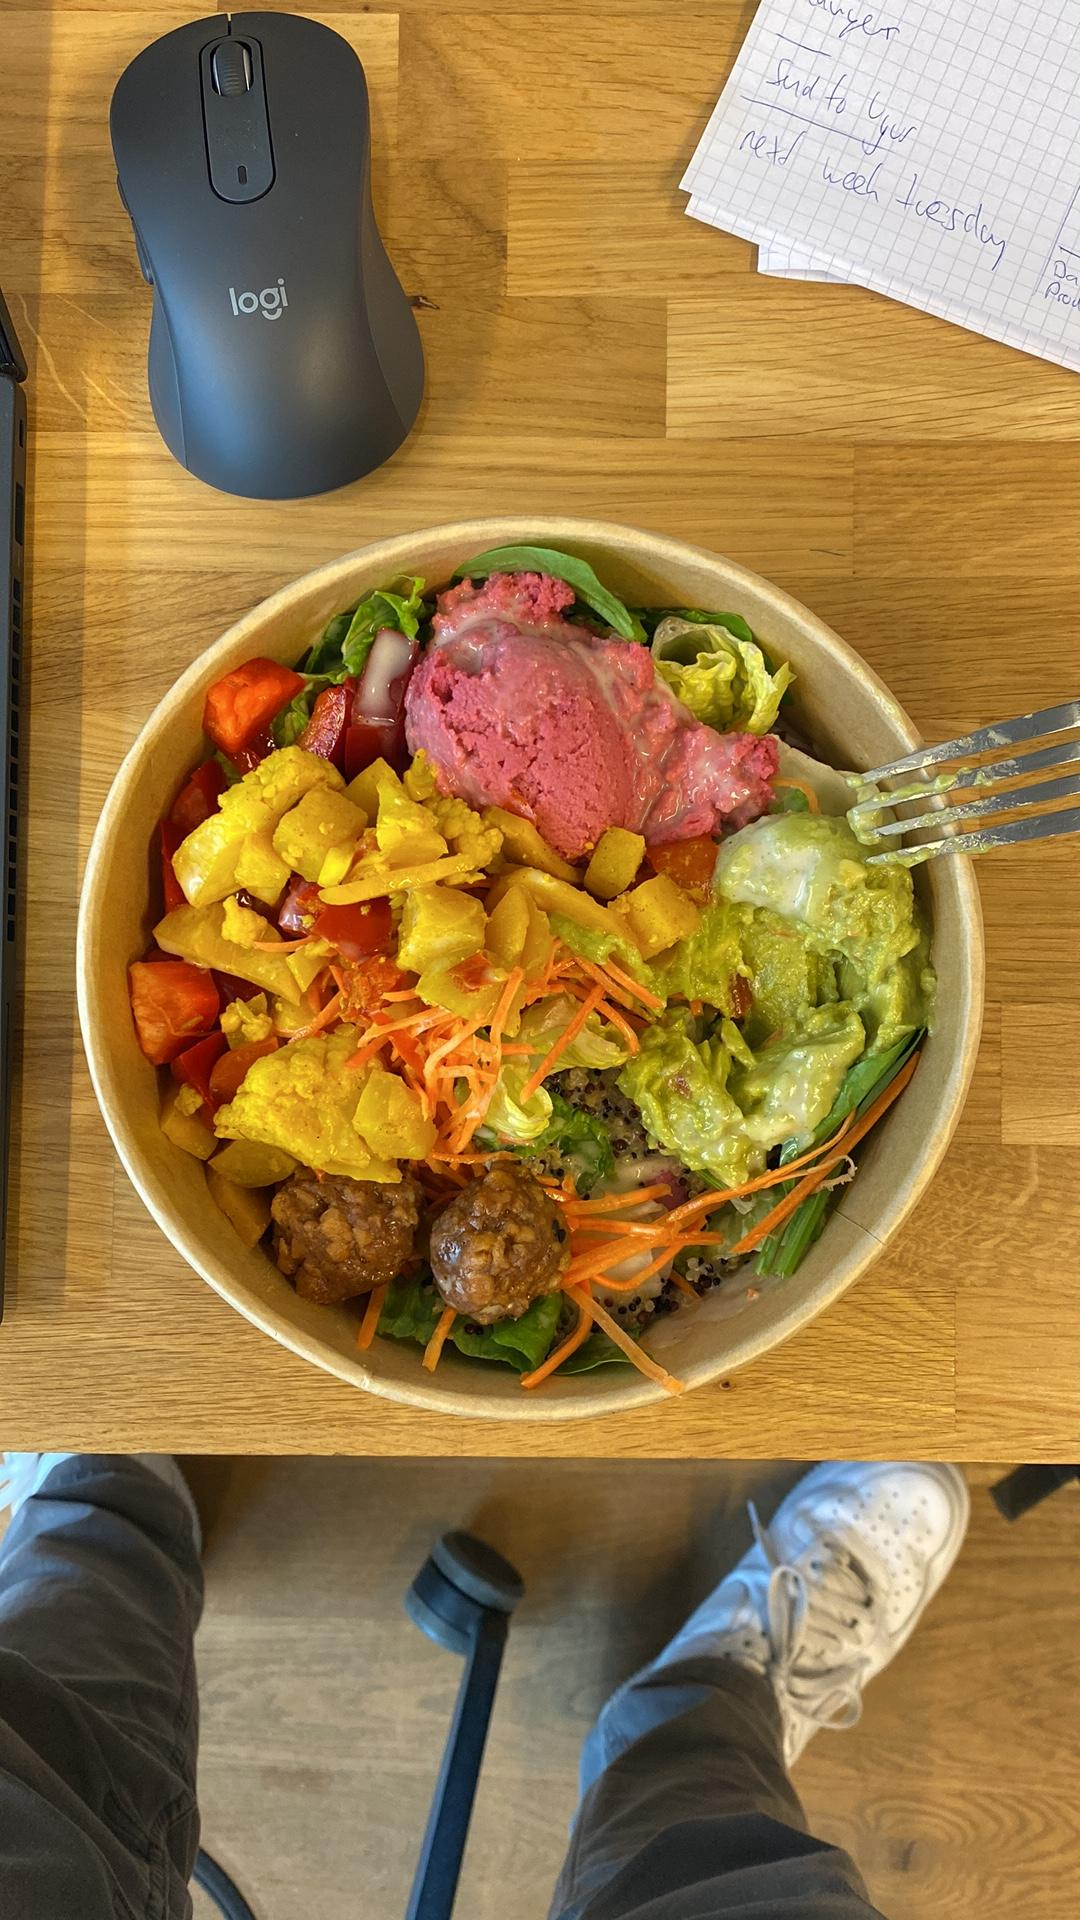

----------------------------------------------------------------------------------------------------
Image 2
   Color Diversity Score: 46%


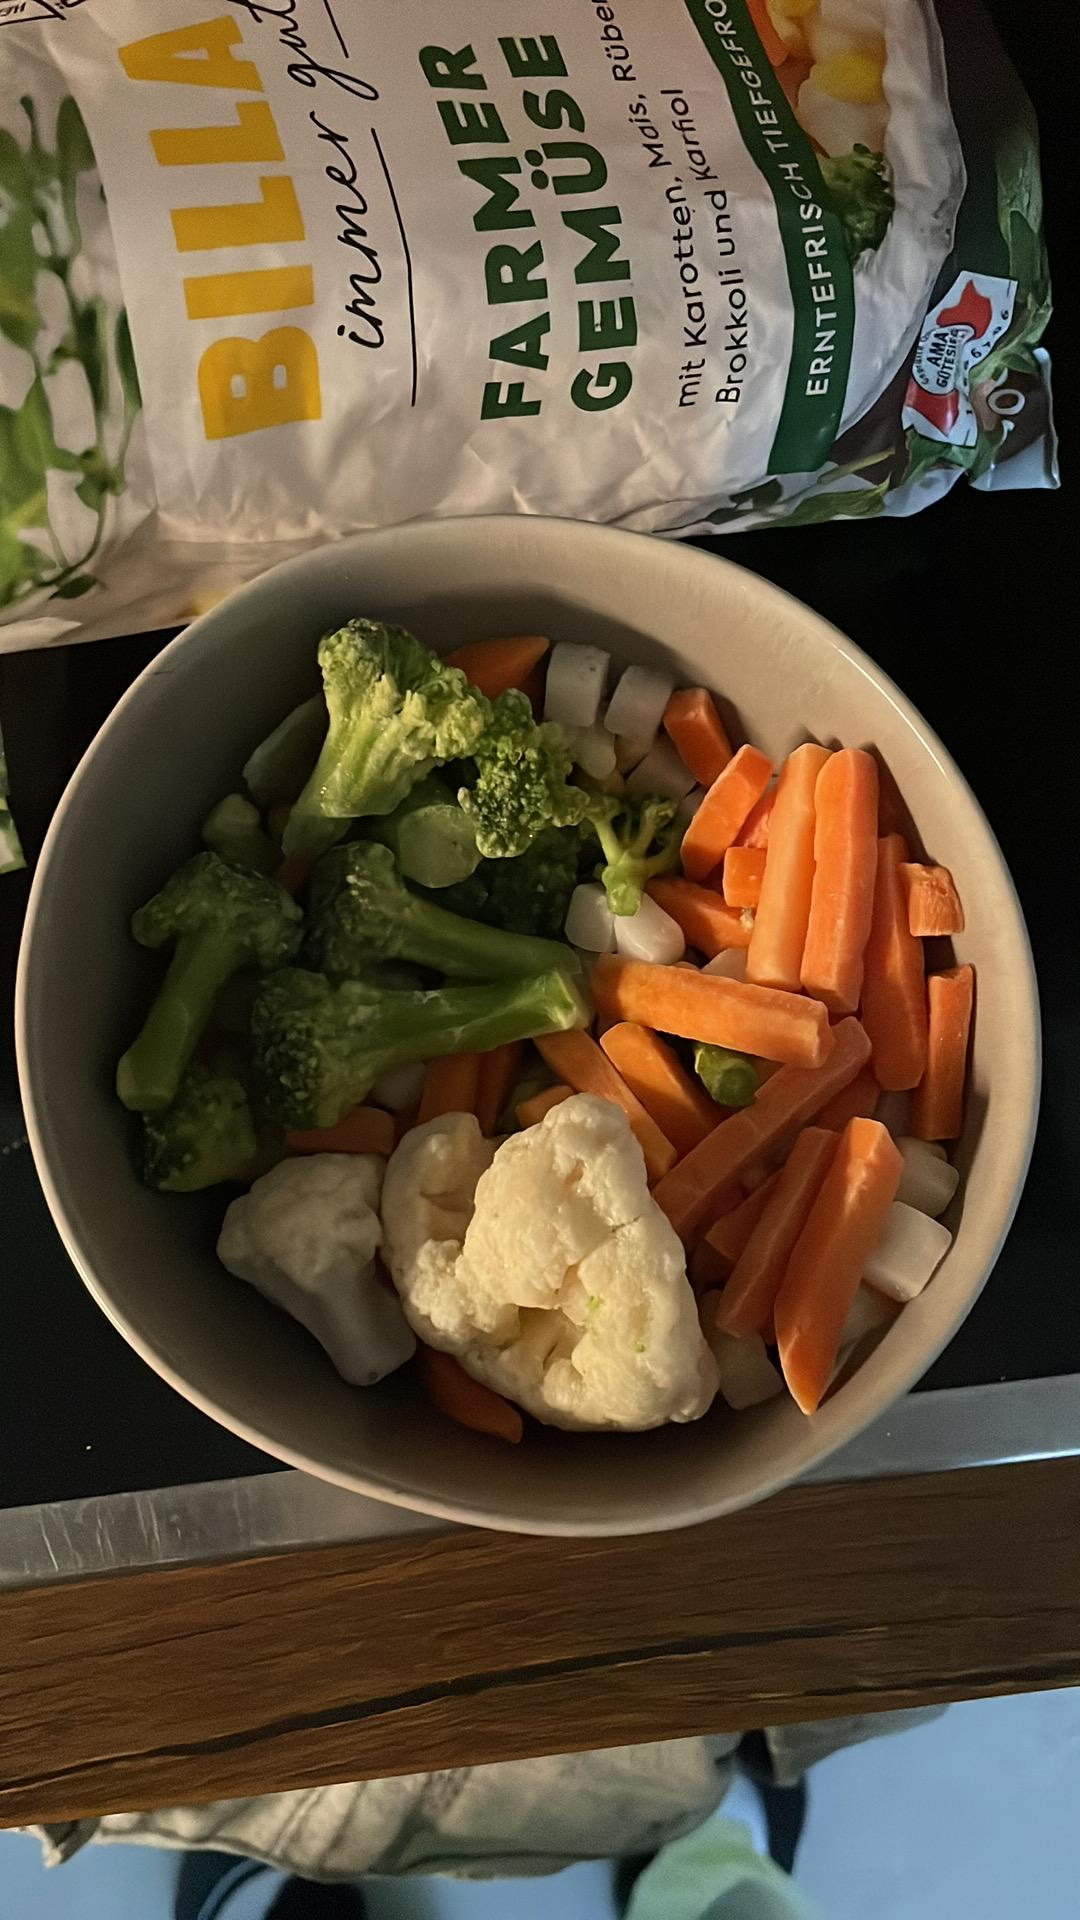

----------------------------------------------------------------------------------------------------
Image 3
   Color Diversity Score: 23%


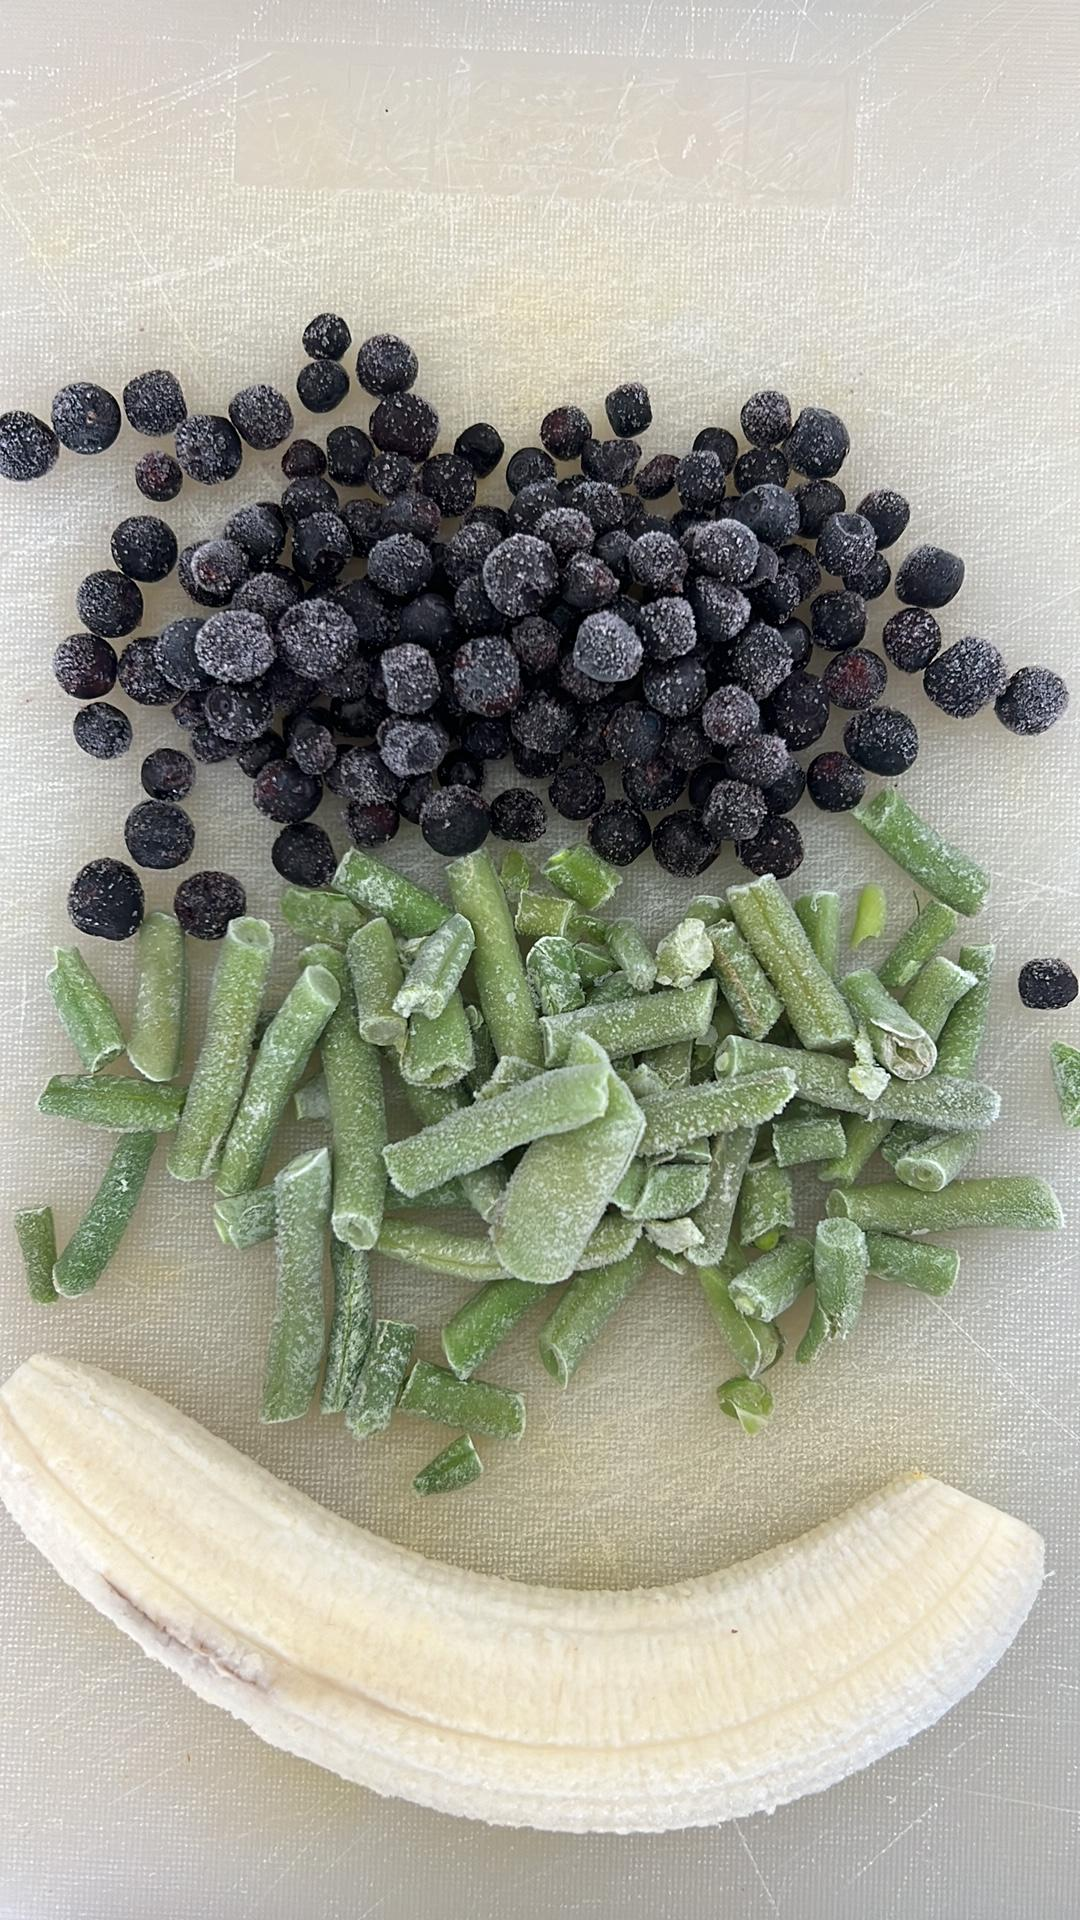

----------------------------------------------------------------------------------------------------
Image 4
   Color Diversity Score: 16%


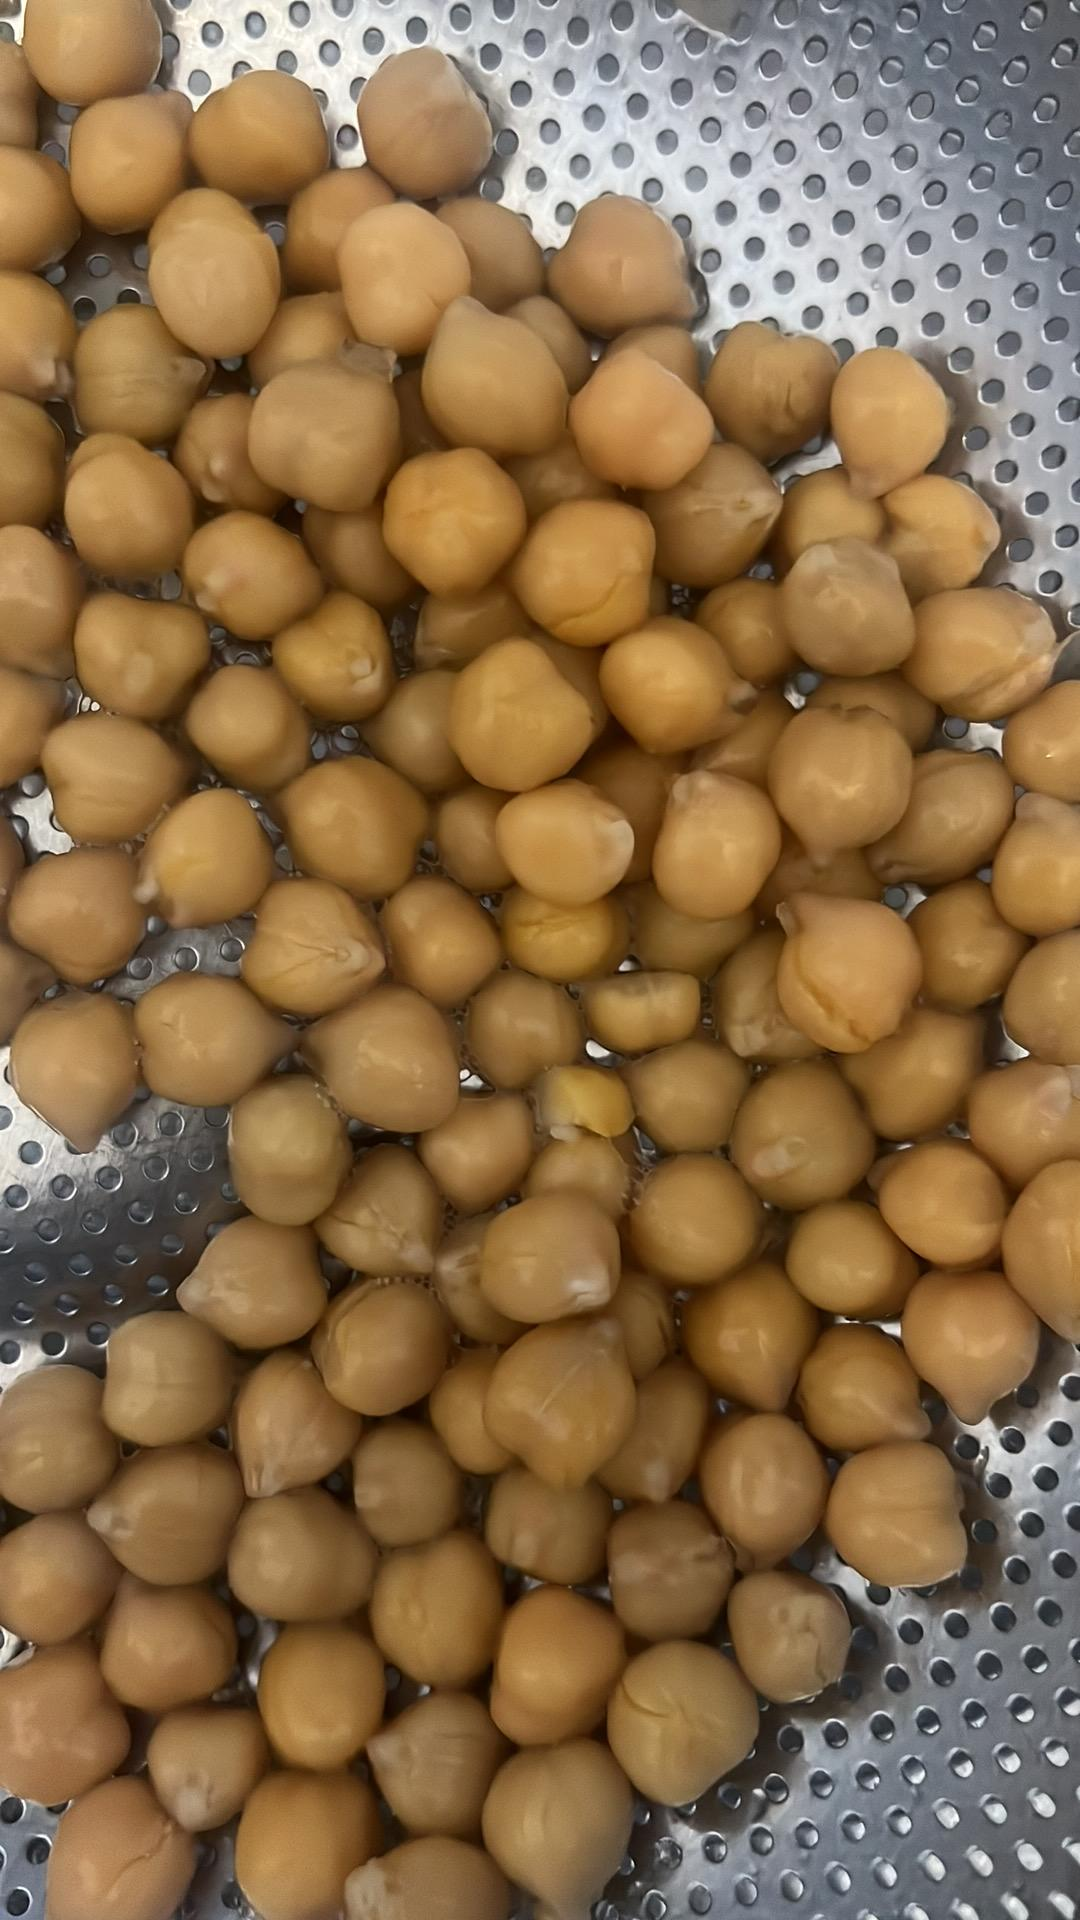

----------------------------------------------------------------------------------------------------
Image 5
   Color Diversity Score: 26%


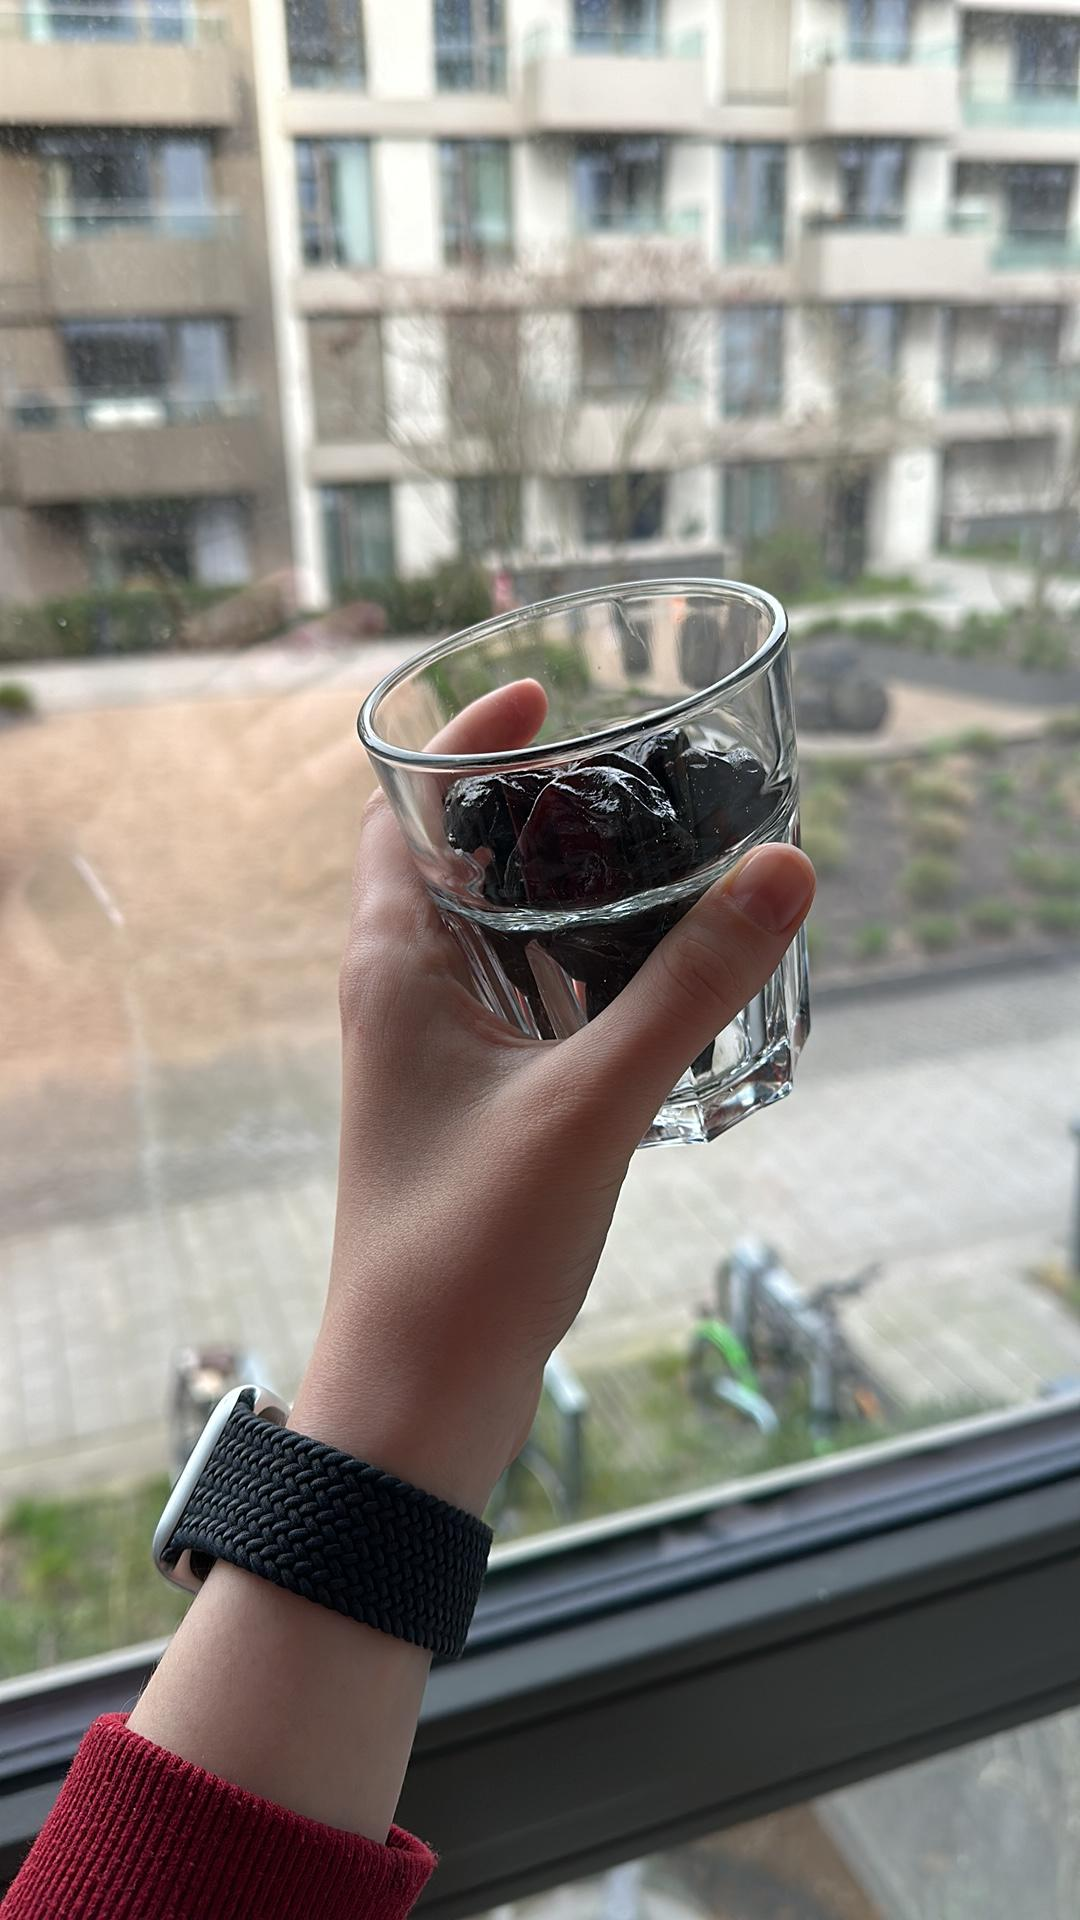

----------------------------------------------------------------------------------------------------


In [13]:
from IPython.display import display, Image

for i in range(0,5):
    image_path = images[i]
    print(f"Image {i+1}")
    diversity_score = calculate_color_diversity(image_path)
    print(f"   Color Diversity Score: {diversity_score}%")
    # Plot image 
    image = Image(image_path, width=300)
    display(image)
    print('-'*100)